# 네이버 블로그 크롤링 (네이버 API 이용)


## 들어가며...



## 1) 크롤링? 파싱?

### 1-1) 크롤링

- '웹 크롤러'라는 단어에서 유래되었음.
- 크롤러란 조직적, 자동화된 방법으로 WWW를 탐색하는 컴퓨터 프로그램.
- 크롤링은 크롤러가 하는 작업을 부르는 말.
- 여러 인터넷 사이트의 페이지(문서,html 등)를 수집해서 분류하는 것.
- 대체로 찾아낸 데이터를 저장한 후 쉽게 찾을 수 있게 인덱싱 수행.

### 1-2) 파싱

- 파싱이란 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공하는 것.
- 파싱이란 일련의 문자열을 의미있는 '토큰'으로 분해하고 이들로 이루어진 '파스 트리'를 만드는 과정.
- 입력 토큰에 내제된 자료 구조를 빌드하고 문법을 검사하는 역할을 함.

## 2) 애플리케이션 등록 ( API 이용신청)

![애플리케이션 등록_1](https://user-images.githubusercontent.com/51112316/61574953-2f655d80-ab01-11e9-8b8f-cc74183302da.jpg)
![애플리케이션 등록_2](https://user-images.githubusercontent.com/51112316/61574954-31c7b780-ab01-11e9-9274-e1d237547d94.jpg)

### 2-1) 네이버API  예제 사용

- 네이버개발자 -> Products -> 서비스API -> 검색 -> 개발 가이드 보기 -> 0.API호출예제 -> Python

#### [API호출예제](https://developers.naver.com/docs/search/blog/)

~~~python
import java.io.BufferedReader;
import java.io.InputStreamReader;
import java.net.HttpURLConnection;
import java.net.URL;
import java.net.URLEncoder;

public class APIExamSearchBlog {

    public static void main(String[] args) {
        String clientId = "YOUR_CLIENT_ID";//애플리케이션 클라이언트 아이디값";
        String clientSecret = "YOUR_CLIENT_SECRET";//애플리케이션 클라이언트 시크릿값";
        try {
            String text = URLEncoder.encode("그린팩토리", "UTF-8");
            String apiURL = "https://openapi.naver.com/v1/search/blog?query="+ text; // json 결과
            //String apiURL = "https://openapi.naver.com/v1/search/blog.xml?query="+ text; // xml 결과
            URL url = new URL(apiURL);
            HttpURLConnection con = (HttpURLConnection)url.openConnection();
            con.setRequestMethod("GET");
            con.setRequestProperty("X-Naver-Client-Id", clientId);
            con.setRequestProperty("X-Naver-Client-Secret", clientSecret);
            int responseCode = con.getResponseCode();
            BufferedReader br;
            if(responseCode==200) { // 정상 호출
                br = new BufferedReader(new InputStreamReader(con.getInputStream()));
            } else {  // 에러 발생
                br = new BufferedReader(new InputStreamReader(con.getErrorStream()));
            }
            String inputLine;
            StringBuffer response = new StringBuffer();
            while ((inputLine = br.readLine()) != null) {
                response.append(inputLine);
            }
            br.close();
            System.out.println(response.toString());
        } catch (Exception e) {
            System.out.println(e);
        }
    }
}
~~~

#### 문제 발생 :  

#### 네이버 블로그 형식 맞춰 긁어왔음.
                  
#### 사실은 요약된 내용.

#### 모든 내용을 다 보고싶으면 개발이 필요.

# 네이버 블로그 크롤링

In [8]:
import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

naver_Client_id = "E4zDnlSmVAnJ7dvIOUUx"
naver_Client_secret = "lLxEw7DWbB"

In [9]:
def get_blog_count(query,display) :
    encode_query=urllib.parse.quote(query)
    search_url="https://openapi.naver.com/v1/search/blog?query="+ encode_query
    # 위의 https://~ 는 따온 API호출예제에 있음.
    request=urllib.request.Request(search_url)
    # 이렇게 하면 내가 만들었던 url 형태로 요청한다.
    # 그러나 이렇게 하면 API로부터 거부당한다.
    # 왜냐하면 ID, Secret을 주지 않았기 때문에 아래와 같이 이것을 입력해준다.
    
    request.add_header("X-Naver-Client-Id",naver_Client_id)
    request.add_header("X-Naver-Client-Secret",naver_Client_secret)
    
    response=urllib.request.urlopen(request)
    response_code=response.getcode()
    
    # code를 받아와서 웹에서 정상적으로 접속했을 때 200번을 준다.
    if response_code is 200 :
        response_body = response.read()  # 실제로 읽어 들인다.
        response_body_dict = json.loads(response_body.decode('utf-8'))
        # 네이버에서 넘겨줄 때 json으로 넘겨주는데 이것을 전부 '딕셔너리'로 저장한다.
        
        print('Last build date :' + str(response_body_dict['lastBuildDate']))
        # json으로 넘겨받을 것들 중에서 최종날짜를 출력
        print('Total :' + str(response_body_dict['total']))  # 관측개수
        print('Start :' + str(response_body_dict['start']))
        print('Display :' + str(response_body_dict['display']))
        #이렇게 넘어온 것을 다 출력해본다.
        
        # 검색된 결과가 0 일 경우        
        if response_body_dict['total']== 0:
            blog_count = 0
        else :
            blog_total=math.ceil(response_body_dict['total']/int(display))
            # 위에서 한 번에 10개씩 출력한다고 했으니 나눠주어서 개수를 맞춰준다.
        
            if blog_total >= 1000 :
                blog_count = 1000
                # 최대 1000개로 제한이 있으니 1000개를 넘었을 때는 1000개로 지정한다.
            else : 
                blog_count = blog_total
        
            print('Blog total :' + str(blog_total))
            print('Blog count : ' + str(blog_count))
        
        return blog_count

- 블로그의 모든 내용을 가져오는 함수[(API사용예제)는 샘플 내용만 가져온다.]



In [10]:
def get_blog_post(query,display,start_index,sort):
    global no, fs
    #get_blog_count(query,display)를 정의할 때 사용했던 것과 동일하게 사용(아래 7문장)
    encode_query = urllib.parse.quote(query)
    # 동일하게 사용하나 search_url에는 옵션을 조금 더 추가해 준다.
    search_url = "https://openapi.naver.com/v1/search/blog?query=" + encode_query +"&display=" + str(display) + "&start=" + str(start_index) + "sort=" + sort
    request=urllib.request.Request(search_url)
    
    request.add_header("X-Naver-Client-Id",naver_Client_id)
    request.add_header("X-Naver-Client-Secret",naver_Client_secret)
    
    response=urllib.request.urlopen(request)
    response_code=response.getcode()
    
    #print(response_code) 이분은 윗부분까지 해서 접속이 잘되었는지를 확인하는 것.
        
    if response_code is 200:
        response_body=response.read()
        response_body_dict=json.loads(response_body.decode('utf-8'))
        # json이 해당하는 블로그가 여러개 나오면 전부 다 하나의 큰 덩어리로 주는데
        # 나눠서 하나씩 접근 하기 위해 아래의 코드를 짜줌.
        for item_index in range(0,len(response_body_dict['items'])):
            # 혹시 태그부분이 따라올 수 있기 때문에
            # 그것을 지우고 사용하기 위해  re(regular expression)으로 제거를 해준다.
            # 즉 태그를 없애주는 정규표현식을 이용한다.
            try :
                remove_html_tag = re.compile('<.*?>')
                title = re.sub(remove_html_tag,'',response_body_dict['items'][item_index]['title'])
                #또한 주소가 따라오는데 이건 필요 없는 것이다.그러므로 없애준다.
                link = response_body_dict['items'][item_index]['link'].replace("amp;","")
                # description에도 마찬가지로 태그가 따라올 수 있기 때문에 제거해준다.
                description = re.sub(remove_html_tag,'',response_body_dict['items'][item_index]['description'])
                blogger_name = response_body_dict['items'][item_index]['bloggername']
                #  포스트(개시글)의 주소가 아니라 블로그 자체의 링크를 가져옴.
                blogger_link = response_body_dict['items'][item_index]['bloggerlink']
                post_date = response_body_dict['items'][item_index]['postdate']
                #아래처럼 변환해서 가져와도 되고 그냥 주는대로 가져와도 된다.
                #post_date = datetime.datetime.strptime(response_body_dict[['item'][item_index]['postdate'],"%Y%m%d").strtime("%Y.%m.%d")
                
               # 이제 json에서 오는 결과를 하나씩 items에 다 들어가 있다. 그것을 이제 다 끄집어서 가져온다.
                no +=1
                print("-------------------------------------------------") #각각의 게시글을 구분시킴
                print("#"+ str(no))  #몇번째 게시글인지 출력
                print("Title :"+ title)
                print("Link :"+ link)
                print("Description :"+ description)
                print("Blogger Name :"+ blogger_name)
                print("Blogger Link :"+ blogger_link)
                print("Post Date :"+ post_date)
                
                                                                              
                post_code = requests.get(link)
                #  저 정보들은 사실 네이버 오픈 API에서 제공해주는 정보다.
                # 그런데 우리가 필요한 것은 실제 블로그에 포스트 된 내용이 필요하기 때문에
                # 뷰티풀숲을 이용해 가져온다. 
                post_text = post_code.text
                post_soup = BeautifulSoup(post_text,'lxml')
                
                # 네이버 블로그의 문제점 : 마우스를 긁어오지 못하게 iframe으로 만들어 놓은게 있다.
                #그래서 iframe#mainFrame 이라는 html 부분을 들어가서
                # 그 부분의 실제 post url을 뽑을 수 있다.
                # 그냥 가져와선 안되고 그 url에서 소스부분(src)만 가져온다.
                # 그래서 그걸로 접속해서 실제적인 블로그 포스트에 대한 내용을 긁어오기 때문에
                # 여기에 다시 한번 "blog_post_url"이라는 주소로 접근을 한다.
                # 그리고 그것들에 대한 정보를 가져온다.
                for mainFrame in post_soup.select('iframe#mainFrame'):
                    blog_post_url = "http://blog.naver.com"+mainFrame.get('src')
                    blog_post_code = requests.get(blog_post_url)
                    blog_post_text = blog_post_code.text
                    blog_post_soup = BeautifulSoup(blog_post_text,'lxml')
                    
                    # 블로그 전체의 여러가지 메뉴들도 있고 그런 것 제외하고 postViewArea라는 부분에
                    # 실제 포스트 내용이 들어있다. 그래서 여기로 선택한다. 이게 진짜 블로그 포스트의 컨텐트다. 
                    for blog_post_content in blog_post_soup.select("div#postViewArea"):
                        blog_post_content_text = blog_post_content.get_text()
                        blog_post_full_contents = str(blog_post_content_text) #컨텐트를 string으로 캐스팅해서 가져온다.
                        blog_post_full_contents = blog_post_full_contents.replace("\n\n",'\n') 
                        #요약된 description 만 주는게 아니라 이젠 진짜로 된 포스트를 준다.
                        #print("blog_post_contents : " + blog_post_full_contents+"\n")
                        #전체 내용을 print 하면 너무 많기 때문에 위의 코드로 하지않고 파일로 저장한다.
                        #이를 통해 이후에 데이터 분석 등에 사용한다.
                        fs.write(blog_post_full_contents+'\n')
                        fs.write("-----------------------------------")
            #만약에 못할 경우 그냥 넘어가는 코드.
            except: 
                item_index+=1
                print("■■■■■■저장할 수 없음.■■■■■■")

In [54]:
if __name__=='__main__' :
    no = 0           # 몇 개의 포스트를 저장했는지 세기 위한 index
    query = "킹크랩 섹션" # 검색을 원하는 문자열로써 UTF-8로 인코딩한다.
    display = 10     # 검색 결과 출력 건수 지정, 10(기본값), 100(최대값)
    start = 1        # 검색 시작 위치로 최대 1000까지 가능
    sort = 'date'    # 정렬 옵션 : sim(유사도순, 기본값), date(날짜순)
    
    #블로그 콘텐츠의 한글 저장을 위해 encoding='utf-8'으로 설정.
    fs = open(query + ".txt",'a',encoding='utf-8')
    
    blog_count = get_blog_count(query,display)
    for start_index in range(start,blog_count + 1, display):
        get_blog_post(query,display,start_index,sort)  
    
       
    fs.close()

Last build date :Mon, 22 Jul 2019 11:24:59 +0900
Total :1114
Start :1
Display :10
Blog total :112
Blog count : 112
-------------------------------------------------
#1
Title :베이비킹크랩 섹션 직접 먹어봤다
Link :https://blog.naver.com/knh514?Redirect=Log&logNo=221393147370
Description :캥크랩은 알지만 베이비킹크랩은 처음 들어봤어요~ 신기신기 직접 먹어본 베이비킹크랩 아이스박스에... 얼음팩과 킹크랩가위 설명서까지 들어있답니다 킹크랩 다리가 도대체 몇마리인지~ 베이비킹크랩 섹션... 
Blogger Name :달콤솜사탕♡
Blogger Link :https://blog.naver.com/knh514
Post Date :20181107
-------------------------------------------------
#2
Title :수산파크 호텔,식당 납품용 냉동대게,킹크랩 섹션 도매 안내
Link :https://blog.naver.com/eastseasusan?Redirect=Log&logNo=221375524424
Description :냉동자숙 대게 섹션은 한박스당 5kg 으로 작업, 킹크랩은 한박스당 7kg 으로 작업했습니다^^ 냉동 자숙 대게섹션, 킹크랩 섹션 도매 납품 문의 주시면 비용, 배송안내드리겠습니다. 출고지는 수입산지인... 
Blogger Name :수산파크
Blogger Link :https://blog.naver.com/eastseasusan
Post Date :20181011
-------------------------------------------------
#3
Title :킹크랩섹션 판매가격,1키로당 45,000원//러시아 캄차카... 
Link :https://blog.naver.com/heesuga?Redirect

-------------------------------------------------
#25
Title :소비뇽블랑, 도그포인트 섹션94
Link :https://blog.naver.com/interkj87?Redirect=Log&logNo=221576959738
Description :음식은 킹크랩. 그에 맞춰 준비한 것은... 소비뇽블랑 . 소블 하면 당연 뉴질랜드이다. 사실 역사로... 도그포인트 뉴질랜드 소비뇽블랑 Dogpoint Vinyard Section 94 2015 섹션 94 2015빈티지. 도그포인트 와이너리는... 
Blogger Name :샴페인샤워의 와인 블로그
Blogger Link :https://blog.naver.com/interkj87
Post Date :20190703
-------------------------------------------------
#26
Title :1월 14일 NS홈쇼핑 엉클크랩 킹크랩 방송후기
Link :https://blog.naver.com/mc_gorilla?Redirect=Log&logNo=221442733467
Description :어제는 바로 NS홈쇼핑에서 엉클크랩 방송이있었죠! 이번년도에서 처음으로 에드워드권 셰프님과 방송을... 몸통절반이있는 섹션상태로 배송받게되는거죠! 이렇게 방송에서 쓰이는 모든 킹크랩은 전부... 
Blogger Name :최성욱의 방송이야기
Blogger Link :https://blog.naver.com/mc_gorilla
Post Date :20190115
-------------------------------------------------
#27
Title :수산물도매시장. 킹크랩 대게 참소라 새우구이 먹고 왔어요!
Link :https://blog.naver.com/ok3171?Redirect=Log&logNo=221485746173
Description :패류 섹션. 어느집에나 가격이 비슷할거라고 생각했지만 다리품을 팔아보면 약간씩은 가격차이가

-------------------------------------------------
#50
Title :킹 크랩 좀 드셔 보셨나요  대게는  저리가라죠 가성비갑 싸게... 
Link :https://blog.naver.com/truthkyj?Redirect=Log&logNo=221270326870
Description :스노우 크랩이라하는 대게가 있죠 요새들 많이 드시더라구요 하짐만 킹 크랩이라고 요새 좀 유명해졌죠... 됩니다 한번 시도해 보시길 #킹크랩#레그섹션 #배불리킹크랩먹자 #대게#보단#킹크랩이지#냉동킹크랩
Blogger Name :쭝이의 일상
Blogger Link :https://blog.naver.com/truthkyj
Post Date :20180508
-------------------------------------------------
#51
Title :일본에서 인기 하나사키 킹크랩/ 호텔,부페 납품만하던... 
Link :https://blog.naver.com/sby888?Redirect=Log&logNo=221312381484
Description :일본에서 인기 하나사키 킹크랩/ 호텔,부페 납품만하던 냉동대게! 특가행사! 안녕하세요... * 일반 절단된 섹션 냉동대게가 아닙니다.통으로 급속동결 시킨 대게로 내장까지 드실수 있어요!... 
Blogger Name :수산파크 동해수산유통
Blogger Link :https://blog.naver.com/sby888
Post Date :20180704
-------------------------------------------------
#52
Title :천안 불당동 상가 신불당 상가 골든스퀘어 섹션오피스... 
Link :https://blog.naver.com/bkj3563?Redirect=Log&logNo=221411348450
Description :킹크랩매장, 대형호프(비어첸), 금수정 식육식당, 포메인 베트남 쌀국수, 그집쭈꾸미, 정육점, 그리고 신협등이 입점 완료 

-------------------------------------------------
#72
Title :인천 가족모임 청라레드크렙에서 생일맞이로 랍스타정식으로... 
Link :https://blog.naver.com/hsjk1004?Redirect=Log&logNo=221537089170
Description :엄청 단독된 룸은 아니지만 섹션이 나누어져서 프라이빗했구요. 다른 테이블에도 나름 섹션이 다... 인천레드크랩 #인천맛집 #인천랍스터 #인천대게 #청라랍스터 #청라대게 #청라킹크랩 #인천킹크랩 #청라맛집... 
Blogger Name :Jackie's paradise ♥
Blogger Link :https://blog.naver.com/hsjk1004
Post Date :20190514
-------------------------------------------------
#73
Title :레드카드바우처 포시즌스호텔뷔페다녀옴
Link :https://blog.naver.com/boma0109?Redirect=Log&logNo=221493295612
Description :입구에는 디저트 섹션과 와인셀러가 있고, 잡지 신문등이 비치되어 있어 식사 후에 따로 카페를 갈... 킹크랩 집게발도 따뜻했으면 더 많이 먹었을텐데..^^; 생각보다 더 맛있었던 나물들과 밥입니다. 오늘 솥밥은... 
Blogger Name :리아한의원 성경현 원장의 블로그
Blogger Link :https://blog.naver.com/boma0109
Post Date :20190320
-------------------------------------------------
#74
Title :일산 가볼만한곳 기억에 남다
Link :https://blog.naver.com/skillsun?Redirect=Log&logNo=221475126892
Description :대게와 킹크랩들이 삼삼오오 모여 한가득 들어가 있었어요 또 물이 투명하더라구요 수조 관리를 꼼꼼히... 뭔

-------------------------------------------------
#94
Title :[ 잠실 시그니엘서울 호텔 ] 스테이 STAY 디너 코스... 
Link :https://blog.naver.com/sona126?Redirect=Log&logNo=221427106655
Description :STAY SEVEN “스타터2” 메인3 디저트2 래드 래디쉬를 곁들인 킹크랩샐러드 배와 성게알 보기에도... 선보이는 섹션도 구경하고 맛도 본다 맥주부터 다양한 술을 이용한 디저트가 많고 배불러서 그 맛을... 
Blogger Name :꿈 의 꽃 다 발
Blogger Link :https://blog.naver.com/sona126
Post Date :20181225
-------------------------------------------------
#95
Title :제주호텔뷔페추천 , 해비치호텔 섬모라 레스토랑에서 다양한... 
Link :https://blog.naver.com/pih870318?Redirect=Log&logNo=221506911844
Description :'라이브 섹션' 이에요. 다른 것도 다 맛있지만 셰프가 즉석에서 조리해주면 그 맛이 더하잖아요.... 킹크랩찜 또는 즉석에서 조리한 제주제철음식 해산물도 맛볼 수 있어요 :) 그리고 파스타, 쌀국수, 우동 등의 면... 
Blogger Name :먹는게 가장 쉬웠어요♪
Blogger Link :https://blog.naver.com/pih870318
Post Date :20190406
-------------------------------------------------
#96
Title :스노우크랩섹션파지(대게섹션)
Link :https://blog.naver.com/ehzy5508?Redirect=Log&logNo=182838799
Description :지난번 킹크랩과 스노우크랩에 관한 포스팅 http://blog.naver.com/ehzy5508/149

-------------------------------------------------
#117
Title :3월 제주도 해비치리조트(해비치호텔앤드리조트)... 
Link :https://blog.naver.com/dmsqneod?Redirect=Log&logNo=221485123430
Description :추가된 &quot;라이브 섹션!&quot; 셰프가 즉석에서 주문을 받아 싱싱한 생선을 바로 썰어주고 원하는 수량의 스시도 만들어 제공하고 제철 해물과, 킹크랩찜 등 신선하게 즐길 수 있게 업그레이드되었어요 제주해비치에... 
Blogger Name :뷰스타 제니의 패션뷰티 이야기
Blogger Link :https://blog.naver.com/dmsqneod
Post Date :20190311
-------------------------------------------------
#118
Title :롯데호텔 프렌치 [피에르가니에르Pierre Gagnaire]... 
Link :https://blog.naver.com/dalcomqueen?Redirect=Log&logNo=221557613127
Description :Goodies&gt;섹션을 만들어보았습니다. 최소 1년이상 묵은 국내외 최고 식당들 사... blog.naver.com https... 레스프리 메뉴 L'esprit Pierre Gagnaire 킹크랩과 석류 아가 젤리 콩피한 이베리코 돼지삼겹살, 훈제한... 
Blogger Name :달콤퀸 미쉘의 미.식.여.행.
Blogger Link :https://blog.naver.com/dalcomqueen
Post Date :20190609
-------------------------------------------------
#119
Title :냉동 자숙 대게 킹크랩
Link :https://blog.naver.com/dkflfkd222?Redirect=Log&logNo=30087826857
Description :자숙대게 자숙 킹크

## 형태소 분석

- mecab : window에서 안되는 걸로 알고 있음.
- 한나눔 : 성능이 떨어지는 것으로 알고 있음
- 카이(카카오 형태소 분석기) : 사전 추가가 안됨.
- 트위터 분석기, 코모란 두 가지를 중점.

In [88]:
from konlpy.tag import *
import time

In [89]:
okt = Okt()
han = Hannanum()
komoran = Komoran()
ko = Kkma()

In [90]:
# 데이터 입수
text = open( '킹크랩 섹션.txt',encoding='utf-8').read() 

In [91]:
# 트위터 morphs
okt_result = okt.morphs(text)
# 트위터 nouns 
okt_result1 = okt.nouns(text)
# 트위터 phrases
okt_result2 = okt.phrases(text)
# 트위터 pos 
okt_result3 = okt.pos(text)

In [92]:
# 트위터 분석기 
print(okt_result1)

['거성', '수산', '판매', '킹크랩', '섹션', '러시아', '캄차카', '해역', '포획', '하자', '마자', '배', '킹크랩', '바로', '손질', '후', '자숙', '배', '급속', '선동', '제품', '율과', '선도', '발생', '여유', '제품', '국내', '반입', '제품', '킹크랩', '부위', '부위', '모두', '제거', '무게', '이기', '킹크랩', '선어', '가격', '면', '더욱', '킹크랩', '섹션', '킹크랩', '최고', '부위', '다릿살', '옆구리', '살', '이', '물', '정도', '가정', '용', '찜솥', '킹크랩', '섹션', '판매', '가격', '키', '당', '키', '로부터', '무료', '택배', '미만', '추가', '박스', '제품', '주문', '전화', '문자', '카톡', '거성', '수산', '킹크랩', '판매', '전국', '택배', '고속버스', '탁송', '어제', '홈쇼핑', '크랩', '방송', '이번', '첫', '킹크랩', '방송', '진행', '전시', '킹크랩', '먹음', '직', '킹크랩', '실제', '고객', '주문', '킹크랩', '섹션', '물', '킹크랩', '모습', '방송', '준비', '위해', '정리', '대표', '모습', '크랩', '전문가', '모습', '보이', '모든', '준비', '마치', '고객', '오늘', '방송', '최', '설례', '쇼핑', '호스트', '우리', '대표', '니', '오늘', '킹크랩', '방송', '대표', '모습', '진행', '킹크랩', '홈쇼핑', '진행', '킹크랩', '중', '역대', '가장', '사이즈', '지금', '홈쇼핑', '진행', '킹크랩', '제품', '준비', '정말', '호스트', '깜짝', '사이즈', '준비', '보시', '얼마만큼', '예전', '준비', '상품', '제품', '를', '위해', '준비', '이', '킹크랩', '다리', '살이',

In [94]:
from collections import Counter

In [95]:
count=Counter(okt_result1)

In [96]:
count.most_common(100)

[('킹크랩', 364),
 ('대게', 244),
 ('가격', 126),
 ('섹션', 116),
 ('다리', 108),
 ('제품', 88),
 ('곳', 88),
 ('것', 88),
 ('냉동', 86),
 ('마리', 86),
 ('호텔', 86),
 ('맛', 80),
 ('음식', 78),
 ('주문', 76),
 ('바로', 72),
 ('이', 68),
 ('판매', 66),
 ('후', 64),
 ('더', 64),
 ('방송', 62),
 ('하나', 62),
 ('수', 60),
 ('오늘', 58),
 ('정말', 58),
 ('샐러드', 58),
 ('살이', 56),
 ('요리', 56),
 ('부페', 56),
 ('수산', 52),
 ('맛집', 52),
 ('배', 50),
 ('무료', 50),
 ('준비', 50),
 ('저', 50),
 ('번', 48),
 ('박달', 48),
 ('요', 46),
 ('뷔페', 46),
 ('사진', 46),
 ('등', 46),
 ('러시아', 44),
 ('제', 44),
 ('급', 44),
 ('게', 44),
 ('코너', 44),
 ('연어', 44),
 ('물', 42),
 ('키', 42),
 ('이상', 42),
 ('때', 42),
 ('해산물', 42),
 ('자숙', 40),
 ('살', 40),
 ('정도', 40),
 ('박스', 40),
 ('사이즈', 40),
 ('아주', 40),
 ('그', 40),
 ('날', 40),
 ('전', 38),
 ('배송', 38),
 ('율', 36),
 ('나', 36),
 ('손질', 34),
 ('택배', 34),
 ('이번', 34),
 ('말', 34),
 ('생각', 34),
 ('종류', 34),
 ('우리', 32),
 ('상품', 32),
 ('좀', 32),
 ('유통', 32),
 ('인분', 32),
 ('디저트', 32),
 ('모두', 30),
 ('고객', 30),
 ('구성', 30),
 

In [99]:
tag2=count.most_common(100)

In [102]:
import pandas as pd
import numpy as np

In [103]:
pd.DataFrame(tag2,columns=['nouns','total'])

,nouns,total
0,킹크랩,364
1,대게,244
2,가격,126
3,섹션,116
4,다리,108
5,제품,88
6,곳,88
7,것,88
8,냉동,86
9,마리,86


## 워드 클라우드

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

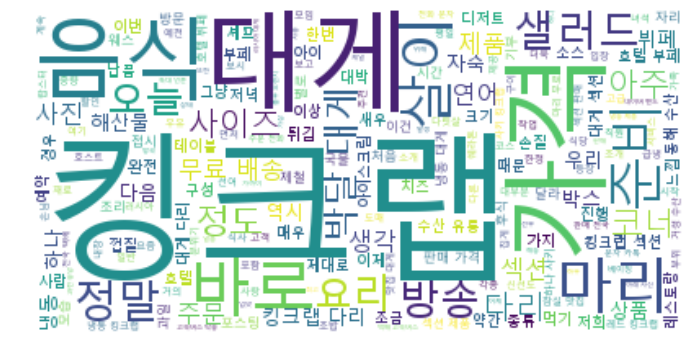

In [76]:
# 트위터 형태소 분석기로 추출한 명사로 워드클라우드를 그린다.
# Window의 경우 폰트 경로
# font_path = 'C:/Windows/Fonts/malgun.ttf';

wordcloud = WordCloud(
    font_path='/Library/Fonts/malgun.ttf',
    background_color='white'
).generate(' '.join(okt_result1))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()